# Projeto 3

### Alura - Curso: Machine Learning: classificação com SKLearn</br>Professor Guilherme Silveira</br>08/07/2022 

## <font color='blue'>Parte I - Utilizando um modelo linear - LinearSVC()</font>

#### Base de dados contendo propostas de projetos de sites web:

* unfinished - 1-Finalizado, 0-Não finalizado (alvo);
* expected_hours - Números de horas previstas para conclusão do projeto;
* price - Valor proposta a ser pago.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
df_propostas_site = pd.read_csv(uri)

In [3]:
df_propostas_site.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


### Renomeando colunas

In [4]:
mapa = {
    'expected_hours' : 'horas_previstas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}

df_propostas_site.rename(columns=mapa, inplace=True)

df_propostas_site.head()

,nao_finalizado,horas_previstas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


### Melhorando a legibilidade da coluna nao_finalizado

In [5]:
troca = {
    0 : 1,
    1 : 0
}

df_propostas_site['finalizado'] = df_propostas_site.nao_finalizado.map(troca)

df_propostas_site.tail()

,nao_finalizado,horas_previstas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [6]:
df_propostas_site.drop('nao_finalizado', axis=1, inplace=True)

df_propostas_site.head()

,horas_previstas,preco,finalizado
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0


### Visualizando relação horas_previstas vs preco

<AxesSubplot:xlabel='horas_previstas', ylabel='preco'>

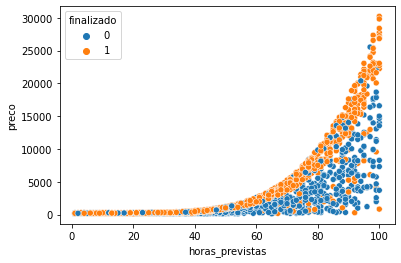

In [7]:
sns.scatterplot(data=df_propostas_site, x="horas_previstas", y="preco", hue="finalizado")

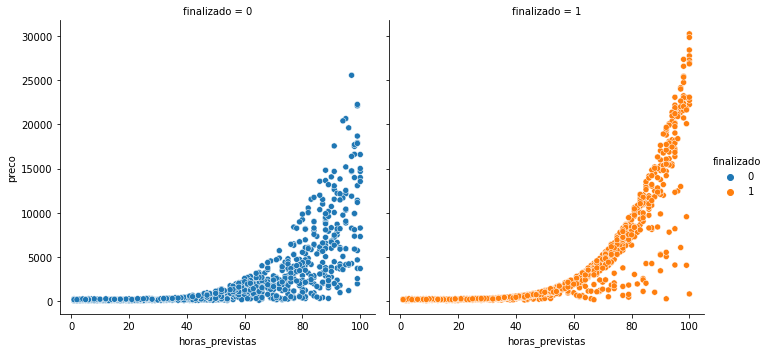

In [8]:
sns.relplot(data=df_propostas_site, x="horas_previstas", y="preco", hue="finalizado", col="finalizado")

### Dividindo entre treino e teste

In [9]:
X = df_propostas_site.drop('finalizado', axis=1)
y = df_propostas_site['finalizado']

In [10]:
SEED = 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=SEED)

In [11]:
print(f'Treino com {X_train.shape[0]} propostas, e teste com {X_test.shape[0]} propostas.')

Treino com 1617 propostas, e teste com 540 propostas.


### Gerando o modelo para previsão
1- Intânciar - LinearSVC();</br>
2- Treinar - fit();</br>
3- Prever - predict();</br>

In [12]:
cls_linear_svc = LinearSVC(random_state=SEED)
cls_linear_svc.fit(X_train, y_train)
previsoes = cls_linear_svc.predict(X_test)

C:\Users\renat\Envs\alura_ml_070722\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Verificar a acurácia alcançada do modelo sobre a base de teste

In [13]:
taxa_acertos =  accuracy_score(y_test, previsoes) * 100

print(f'Percentual de acurácia - {(taxa_acertos):.2f}%')

Percentual de acurácia - 54.07%


<font color='red'>A acurácia foi muito baixa.</font>

### Visualizando a base de treino 
Vai permitir avaliar se a amostra de treino foi representativa em relação a base de teste

<AxesSubplot:xlabel='horas_previstas', ylabel='preco'>

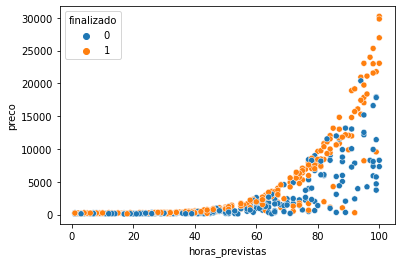

In [14]:
sns.scatterplot(data=X_test, x="horas_previstas", y="preco", hue=y_test)

<font color='blue'>Aparentemente a amostra foi representativa, próxima ao grafico com o a base inteira.<font>

### Avaliando o modelo criado
Vamos prever todos os possíveis ponto e visualizar a curva de corte criado pelo modelo

In [15]:
X_horas_previstas_min = X_test.horas_previstas.min()
X_horas_previstas_max = X_test.horas_previstas.max()

X_preco_min = X_test.preco.min()
X_preco_max = X_test.preco.max()

In [16]:
# Vamos utilizar uma matriz 100 x 100 = 10000 pixels para representar nosso modelo
pixels = 100

lista_horas_previstas = np.arange(X_horas_previstas_min, X_horas_previstas_max, (X_horas_previstas_max - X_horas_previstas_min) / pixels)
lista_preco           = np.arange(X_preco_min          , X_preco_max          , (X_preco_max - X_preco_min) / pixels)

In [17]:
# Gerando o grid
xx, yy = np.meshgrid(lista_horas_previstas, lista_preco)

print(f'xx.shape - {xx.shape}')
print(f'yy.shape - {yy.shape}')

xx

xx.shape - (100, 100)
yy.shape - (100, 100)


array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [18]:
# Concaternar todos os valores do grid
matriz_possibilidades = np.c_[xx.ravel(), yy.ravel()]

matriz_possibilidades.shape

(10000, 2)

In [19]:
# Realizando as previsoes para a matriz de possibilidades
previsoes = cls_linear_svc.predict(matriz_possibilidades)

# Readequando previsoes para uma matriz 100 x 100
previsoes = previsoes.reshape(xx.shape)
previsoes

C:\Users\renat\Envs\alura_ml_070722\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

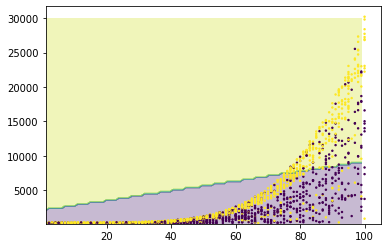

In [20]:
plt.contourf(xx, yy, previsoes, alpha=0.3)

plt.scatter(
    x= X.horas_previstas, # Coluna horizontal x
    y= X.preco,           # Coluna vestical y
    c= y,                 # Colorindo de acordo com y_test
    s= 2)                 # tamanho do ponto

<font color='red'>
    Perceba que a curva de decisão (decision boundary) do algoritmo não acompanham a curva esperada.</br></br>
    Precisamos de algum modelo estimador que seja capaz de aprender um padrão mais inteligente. O algoritmo que estamos utilizando só é capaz de aprender uma linha reta, que não serve para classificação da nossa base de dados.
</font>

## <font color='blue'>Parte II - Utilizando um modelo não linear - SVC()</font>

### Gerando o modelo para previsão
1- Intânciar - SVC();</br>
2- Treinar - fit();</br>
3- Prever - predict();</br>

In [21]:
cls_svc = SVC(gamma='auto', random_state=SEED)
cls_svc.fit(X_train, y_train)
previsoes = cls_svc.predict(X_test)

### Verificar a acurácia alcançada do modelo sobre a base de teste

In [22]:
taxa_acertos =  accuracy_score(y_test, previsoes) * 100

print(f'Percentual de acurácia - {(taxa_acertos):.2f}%')

Percentual de acurácia - 59.07%


<font color='red'>O modelo SVC() não apresentou uma melhora significativa.<font>

### Avaliando o modelo criado

In [23]:
# Realizando as previsoes para a matriz de possibilidades
previsoes = cls_svc.predict(matriz_possibilidades)

# Readequando previsoes para uma matriz 100 x 100
previsoes = previsoes.reshape(xx.shape)
previsoes

C:\Users\renat\Envs\alura_ml_070722\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

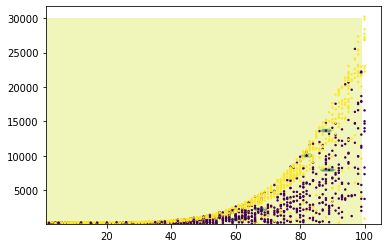

In [24]:
plt.contourf(xx, yy, previsoes, alpha=0.3)

plt.scatter(
    x= X.horas_previstas, # Coluna horizontal x
    y= X.preco,           # Coluna vestical y
    c= y,                 # Colorindo de acordo com y_test
    s= 2)                 # tamanho do ponto

<font color='red'>
    Analisando a plotagem, percebemos que de fato foram realizados relacionamentos não lineares. Há pequenos agrupamentos de cor diferente que representam as previsões do algoritmo para projetos que terão valor 1, e o restante será 0. Não estamos tendo um palpite muito inteligente.<br/><br/>
    Isso ocorre devido a discrepância entre os eixos: em X, teremos valores de 0 a 100, e em Y de 0 a 30000. Esses algoritmos são muito suscetíveis a escala, e darão menos valor para variações menores, como é o caso de X.
</font>

### Reescalando valores de X e Y com StandardScaler()

In [25]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler  = scaler.transform(X_test )

In [26]:
scaler.get_feature_names_out()

array(['horas_previstas', 'preco'], dtype=object)

In [27]:
X_train_scaler

array([[-1.20810685, -0.58850785],
       [-0.25992095, -0.48069545],
       [ 1.46086087,  0.13548927],
       ...,
       [-0.57598292, -0.58492075],
       [ 1.21503489,  0.45294796],
       [ 1.1799169 ,  1.18670998]])

Criar modelo e realizar previsões

In [28]:
cls_svc = SVC(gamma='auto', random_state=SEED)
cls_svc.fit(X_train_scaler, y_train)

previsoes = cls_svc.predict(X_test_scaler)

Verificando taxa de acertos

In [29]:
taxa_acertos =  accuracy_score(y_test, previsoes) * 100

print(f'Percentual de acurácia - {(taxa_acertos):.2f}%')

Percentual de acurácia - 66.85%


Visualizando curva de decisão

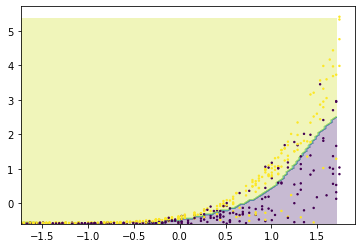

In [30]:
# índices numpy 0-'horas_previstas', 1-'preco'
X_horas_previstas_min = X_test_scaler[:, 0].min()
X_horas_previstas_max = X_test_scaler[:, 0].max()

X_preco_min = X_test_scaler[:, 1].min()
X_preco_max = X_test_scaler[:, 1].max()

# Vamos utilizar uma matriz 100 x 100 = 10000 pixels para representar nosso modelo
pixels = 100

lista_horas_previstas = np.arange(X_horas_previstas_min, X_horas_previstas_max, (X_horas_previstas_max - X_horas_previstas_min) / pixels)
lista_preco           = np.arange(X_preco_min          , X_preco_max          , (X_preco_max - X_preco_min) / pixels)

# Gerando o grid
xx, yy = np.meshgrid(lista_horas_previstas, lista_preco)

# Concaternar todos os valores do grid
matriz_possibilidades = np.c_[xx.ravel(), yy.ravel()]

# Realizando as previsoes para a matriz de possibilidades
previsoes = cls_svc.predict(matriz_possibilidades)

# Readequando previsoes para uma matriz 100 x 100
previsoes = previsoes.reshape(xx.shape)
previsoes

# Plotando gráfico
plt.contourf(xx, yy, previsoes, alpha=0.3)

plt.scatter(
    x= X_test_scaler[:, 0], # Coluna horizontal x
    y= X_test_scaler[:, 1], # Coluna vestical y
    c= y_test,              # Colorindo de acordo com y_test
    s= 2)                   # tamanho do ponto

<font color='green'>
    Comparando as linhas de decisões dos modelos LinearSVC em relação ao SVC, o modelo apresentou uma curva de decisão bem marcada e o estimador possui uma taxa de acerto um pouco maior, de 66.85%.</br></br>
    Existem diversos estimadores, os dois que utilizamos até agora são baseados em um algoritmo chamado Suport Vector Machine. LinearSVC possui uma restrição e consegue apenas estabelecer relacionamentos lineares, enquanto o SVC é capaz de elaborar curvas e atingiu uma taxa de acurácia mais interessante no caso do nosso projeto.
</font>